# 3.5 Método de Newton-Raphson

Muitos problemas em ciências e engenharia envolvem a resolução de uma equação que pode ser colocada na forma 

$$f(x)=0$$

Em muitos casos, a solução exata $\overline{x}$ só pode ser encontrada por processos numéricos. Uma solução numérica é geralmente obtida por meio de um processo iterativo que gera uma sequência de soluções aproximadas, que converge para a solução exata, a partir de uma aproximação inicial $x_0$. 

O **Método de Newton** para zeros de funções reais de uma variável basea-se no Método do Ponto Fixo e consiste em encontrar uma função de interação $\phi(x)$ tal que $|\phi'(x)|<1$. Dessa forma, escolhendo-se uma "boa" aproximação inicial $x_0$ garantimos que a sequência de soluções aproximadas irá convergir para a solução exata $\overline{x}$.

Para isso, estabelecemos que $|\phi'(x)|=0$ e escrevemos 

$$\phi(x) = x+\theta(x)f(x)$$ 

onde $\theta(x)$ é uma função de $x$ tal que $\theta(\overline{x})\neq 0$. Então, para o ponto fixo $x=\overline{x}$ tem-se $\phi(\overline{x}) = \overline{x}$. Assim, derivando a função $\phi(x)$ e avaliando no ponto fixo obtemos:

$$\phi(x) = x+\theta(x)f(x)$$

$$\phi'(x) = 1+\theta'(x)f(x) + \theta(x)f'(x)$$

avaliando em $\overline{x}$

$$\phi'(\overline{x}) = 1+\theta'(\overline{x})f(\overline{x}) + \theta(\overline{x})f'(\overline{x})$$


$$ 0 = 1 + \theta(\overline{x})f'(\overline{x}) $$

ou 

$$  \theta(\overline{x}) = -\frac{1}{f'(\overline{x})} $$

Assim, escolhento $\theta(x) = -\frac{1}{f'(x)}$ e substituindo em $\Phi(x) = x+\theta(x)f(x)$ obtemos

$$ \phi(x) = x - \frac{f(x)}{f'(x)}$$

que fornece o processo iterativo do método de Newton:

$$ \phi(x_{i+1}) = x_i - \frac{f(x_i)}{f'(x_i)}$$

A cada iteração, o ponto $x_{i+1}$ corresponde à intersecção da reta tangente à função $f(x)$ no ponto 
$(x_i, f(x_i))$, assim, o método de Newton pode ser interpretado geometricamente como mostra a figura abaixo.

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/3_ZEROS_DE_FUNCOES/images/newton_raphson.PNG" width="350">

Observe que 
$$tg(\alpha) = f'(x_i) = \frac{f(x_i)}{(x_i-x_{i+1})}$$
, ou seja, 
$$ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$$ 
que corresponde exatamente ao processo iterativo do Método de Newton. Observe que para o método funcionar é preciso que $f'(x_i) \neq 0$.


### Exemplo
Encontre a raiz de $f(x)=ln(x)+x-4$

In [1]:
import math

f = lambda x: math.log(x)+x-4.0
flinha = lambda x: 1./x +1  
x = 30.0
x_ant = x
err = 10.0

while err>0.0001:
    x = x - f(x)/flinha(x)
    err = abs(x-x_ant)/abs(x)
    x_ant = x
    print ("| x=%.9f"%x, "| err=%.9f"%err)

| x=1.547228340 | err=18.389510403
| x=2.771966031 | err=0.441829978
| x=2.925173019 | err=0.052375360
| x=2.926271010 | err=0.000375218
| x=2.926271062 | err=0.000000018


Apenas fazendo o gráfico para conferir

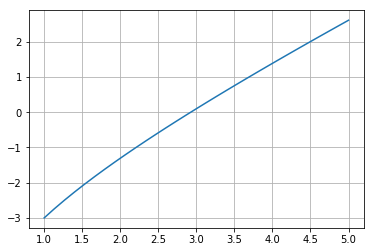

In [6]:
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: np.log(x)+x-4.0
X = np.linspace(1, 5, 31)
plt.plot(X, f(X), "-") 
plt.grid()
plt.show()

Ou ainda, fazendo os gráficos de $f_1(x)= lnx$ e $f_2(x)=-x+4$ 

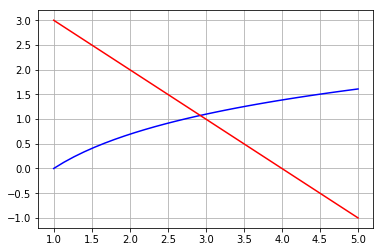

In [7]:
import numpy as np
import matplotlib.pyplot as plt
f1 = lambda x: np.log(x)
f2 = lambda x: -x+4.0
X = np.linspace(1, 5, 31)
plt.plot(X, f1(X), "b-", X, f2(X), "r-") 
plt.grid()
plt.show()

### Exemplo

In [9]:
import math

x = 1.5
err = 10.0
x_ant = x

while err>0.0001:
    
    x = x - (math.log(x)+x-4)/(1.0/x + 1)
    
    err = abs(x-x_ant)/abs(x)
    
    x_ant = x
    
    print ("| x=%.9f"%x, "| err=%.9f"%err)

| x=2.756720935 | err=0.455875283
| x=2.924937549 | err=0.057511181
| x=2.926270985 | err=0.000455678
| x=2.926271062 | err=0.000000026


### Exemplo

In [12]:
import math
x0 = 3.0
f = lambda x: 2*x-math.exp(-2*x)
df = lambda x: 2+2*math.exp(-2*x)


# Inicializandoas variáveis
err = 10.0
x_ant = x0
i = 0
eps = 0.001

while err>eps:
    x = x_ant-f(x_ant)/df(x_ant)    
    err = abs(x-x_ant)/x
    x_ant = x
    i=i+1
    print (i, "| x=%.5f"%x, "| err=%.5f"%err)

1 | x=0.00865 | err=345.65325
2 | x=0.25213 | err=0.96568
3 | x=0.28321 | err=0.10975
4 | x=0.28357 | err=0.00129
5 | x=0.28357 | err=0.00000
